In [10]:
!pip install idx2numpy

  Created wheel for idx2numpy: filename=idx2numpy-1.2.3-py3-none-any.whl size=7919 sha256=a6af90aa218a555cc2294862fe3d7b7b36ae649d4d540ec37432bae03f4df21b
  Stored in directory: c:\users\bhavy\appdata\local\pip\cache\wheels\34\61\53\a6a64db5e907bdf792f401b5bfb922eabfe6686d08692167f3
Successfully built idx2numpy


In [29]:
import seaborn as sns
from tensorflow.keras.datasets import fashion_mnist
import pandas as pd
import idx2numpy
import numpy as np
import matplotlib.pyplot as plt

In [34]:
def scale_images(train_images, test_images):
    # Calculate the mean and standard deviation of the train_images dataset
    mean = np.mean(train_images, axis=0)
    std = np.std(train_images, axis=0)

    # Apply feature scaling to the train_images dataset
    train_images_scaled = (train_images - mean) / std

    # Apply feature scaling to the test_images dataset
    test_images_scaled = (test_images - mean) / std

    return train_images_scaled, test_images_scaled

In [66]:


# Specify the path to the train-images-idx3-ubyte file
file_path_train_images = 'Dataset/train-images-idx3-ubyte'
file_path_train_labels = 'Dataset/train-labels-idx1-ubyte'
file_path_test_images = 'Dataset/t10k-images-idx3-ubyte'
file_path_test_labels = 'Dataset/t10k-labels-idx1-ubyte'

# Load the file using idx2numpy
train_images = idx2numpy.convert_from_file(file_path_train_images)
train_labels = idx2numpy.convert_from_file(file_path_train_labels)
test_images = idx2numpy.convert_from_file(file_path_test_images)
test_labels = idx2numpy.convert_from_file(file_path_test_labels)


# Display the shape of the loaded dataset
print(train_images.shape)
print(train_lables.shape)
print(test_images.shape)
print(test_lables.shape)


(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [67]:
# Count the number of samples in the dataset
num_samples = len(train_images) + len(test_images)
print("Number of samples in the dataset:", num_samples)

# Count the number of samples for each class
class_counts = {}
for label in train_lables:
    if label in class_counts:
        class_counts[label] += 1
    else:
        class_counts[label] = 1
for label in test_lables:
    if label in class_counts:
        class_counts[label] += 1
    else:
        class_counts[label] = 1
print("Number of samples for each class:", class_counts)

# Get the dimension of the images
image_shape = train_images[0].shape
print("Dimension of the images:", image_shape)


Number of samples in the dataset: 70000
Number of samples for each class: {9: 7000, 0: 7000, 3: 7000, 2: 7000, 7: 7000, 5: 7000, 1: 7000, 6: 7000, 4: 7000, 8: 7000}
Dimension of the images: (28, 28)


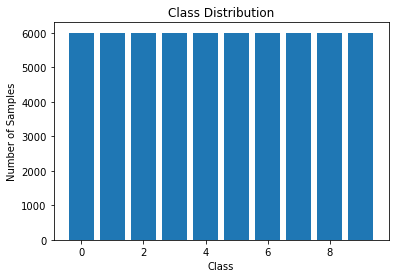

In [68]:
# Count the number of samples for each class for training
class_counts = {}
for label in train_lables:
    if label in class_counts:
        class_counts[label] += 1
    else:
        class_counts[label] = 1

# Plot the bar graph
plt.bar(class_counts.keys(), class_counts.values())
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Class Distribution')
plt.show()


In [69]:
# feature scaling
train_images_scaled, test_images_scaled = scale_images(train_images, test_images)

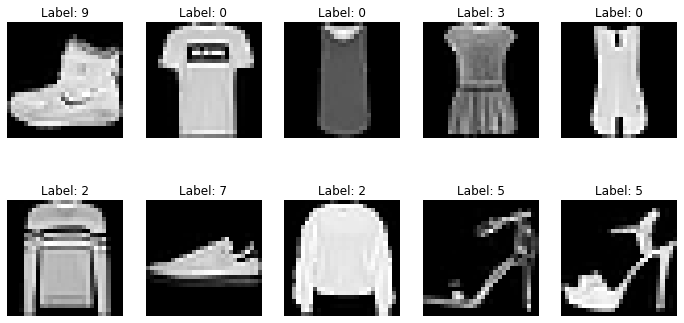

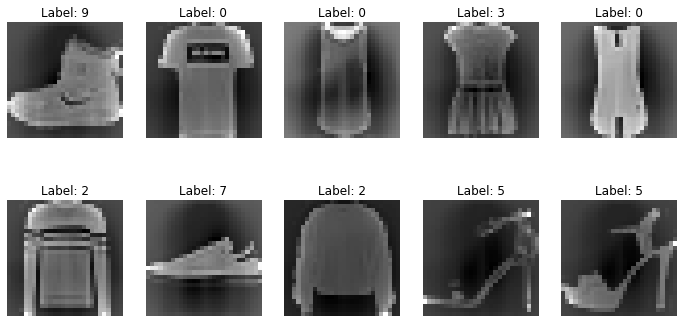

In [70]:
# Plot the first 10 images from the train_images dataset
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
for i, ax in enumerate(axes.flat):
    ax.imshow(train_images[i], cmap='gray')
    ax.axis('off')
    ax.set_title(f'Label: {train_lables[i]}')
plt.show()

# Plot the first 10 images from the train_images_scalled dataset
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
for i, ax in enumerate(axes.flat):
    ax.imshow(train_images_scaled[i], cmap='gray')
    ax.axis('off')
    ax.set_title(f'Label: {train_lables[i]}')
plt.show()

In [71]:
train_images_flat = train_images.reshape(train_images.shape[0], -1)
test_images_flat = test_images.reshape(test_images.shape[0], -1)

In [72]:
import numpy as np

# Define the sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Define the one-hot encoding function
def one_hot_encode(labels, num_classes):
    num_samples = len(labels)
    encoded_labels = np.zeros((num_samples, num_classes))
    for i, label in enumerate(labels):
        encoded_labels[i, label] = 1
    return encoded_labels

# Define the logistic regression function
def logistic_regression(X_train, y_train, X_val, y_val, learning_rate=0.01, num_iterations=1000):
    # Initialize the parameters
    num_samples, num_features = X_train.shape
    num_classes = len(np.unique(y_train))
    weights = np.zeros((num_features, num_classes))
    bias = np.zeros(num_classes)

    # Initialize lists to store loss and accuracy values
    train_loss = []
    train_accuracy = []
    val_loss = []
    val_accuracy = []

    # Perform gradient descent
    for i in range(num_iterations):
        # Compute the logits
        logits = np.dot(X_train, weights) + bias

        # Compute the probabilities
        probabilities = sigmoid(logits)

        # Compute the loss
        loss = -np.mean(np.log(probabilities[np.arange(num_samples), y_train]))

        # Compute the gradients
        gradients = (1 / num_samples) * np.dot(X_train.T, (probabilities - one_hot_encode(y_train, num_classes)))

        # Update the parameters
        weights -= learning_rate * gradients
        bias -= learning_rate * np.mean(probabilities - one_hot_encode(y_train, num_classes), axis=0)

        # Compute the training accuracy
        train_predictions = np.argmax(probabilities, axis=1)
        train_accuracy.append(np.mean(train_predictions == y_train))

        # Compute the validation accuracy
        val_logits = np.dot(X_val, weights) + bias
        val_probabilities = sigmoid(val_logits)
        val_predictions = np.argmax(val_probabilities, axis=1)
        val_accuracy.append(np.mean(val_predictions == y_val))

        # Store the loss values
        train_loss.append(loss)
        val_loss.append(-np.mean(np.log(val_probabilities[np.arange(len(y_val)), y_val])))

    return weights, bias, train_loss, train_accuracy, val_loss, val_accuracy

# Train one logistic regression model for each class
models = []
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []

#define the number of classes
num_classes = 10

for class_label in range(num_classes):
    # Create a binary label array for the current class
    binary_labels_train = (train_labels == class_label).astype(int)
    binary_labels_val = (val_labels == class_label).astype(int)

    # Train the logistic regression model
    weights, bias, train_loss, train_accuracy, val_loss, val_accuracy = logistic_regression(train_images_flat, binary_labels_train, val_images_flat, binary_labels_val)

    # Store the model and metrics
    models.append((weights, bias))
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)

# Plot the loss and accuracy curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
for class_label in range(num_classes):
    plt.plot(train_losses[class_label], label=f'Training Loss (Class {class_label})')
    plt.plot(val_losses[class_label], label=f'Validation Loss (Class {class_label})')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss Curves')
plt.legend()

plt.subplot(1, 2, 2)
for class_label in range(num_classes):
    plt.plot(train_accuracies[class_label], label=f'Training Accuracy (Class {class_label})')
    plt.plot(val_accuracies[class_label], label=f'Validation Accuracy (Class {class_label})')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Accuracy Curves')
plt.legend()

plt.tight_layout()
plt.show()

# Evaluate the models on the test set
test_losses = []
test_accuracies = []



for class_label in range(num_classes):
    # Create a binary label array for the current class
    binary_labels_test = (test_labels == class_label).astype(int)

    # Get the weights and bias for the current class
    weights, bias = models[class_label]

    # Compute the logits for the test set
    test_logits = np.dot(test_images_flat, weights) + bias

    # Compute the probabilities for the test set
    test_probabilities = sigmoid(test_logits)

    # Compute the loss and accuracy for the test set
    test_loss = -np.mean(np.log(test_probabilities[np.arange(len(test_labels)), binary_labels_test]))
    test_accuracy = np.mean(np.argmax(test_probabilities, axis=1) == binary_labels_test)

    # Store the loss and accuracy values
    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)


# Report the final loss and accuracies for each class on the test set
for class_label in range(num_classes):
    print(f"Class {class_label}: Loss = {test_losses[class_label]}, Accuracy = {test_accuracies[class_label]}")


NameError: name 'val_labels' is not defined

In [58]:
import numpy as np

# Define the softmax function
def softmax(logits):
    exp_logits = np.exp(logits)
    return exp_logits / np.sum(exp_logits, axis=1, keepdims=True)

# Define the one-hot encoding function
def one_hot_encode(labels):
    num_classes = len(np.unique(labels))
    encoded_labels = np.zeros((len(labels), num_classes))
    for i, label in enumerate(labels):
        encoded_labels[i, label] = 1
    return encoded_labels

def logistic_regression_monitoring(X_train, y_train, X_val, y_val, learning_rate=0.01, num_iterations=1000):
    # Initialize the parameters
    num_samples, num_features = X_train.shape
    num_classes = len(np.unique(y_train))
    weights = np.zeros((num_features, num_classes))
    bias = np.zeros(num_classes)

    # Initialize lists to store loss and accuracy values
    train_loss = []
    train_accuracy = []
    val_loss = []
    val_accuracy = []

    # Perform gradient descent
    for i in range(num_iterations):
        # Compute the logits
        logits = np.dot(X_train, weights) + bias

        # Compute the probabilities
        probabilities = softmax(logits)

        # Compute the loss
        loss = -np.mean(np.log(probabilities[np.arange(num_samples), y_train]))

        # Compute the gradients
        gradients = (1 / num_samples) * np.dot(X_train.T, (probabilities - one_hot_encode(y_train)))

        # Update the parameters
        weights -= learning_rate * gradients
        bias -= learning_rate * np.mean(probabilities - one_hot_encode(y_train), axis=0)

        # Compute the training accuracy
        train_predictions = np.argmax(probabilities, axis=1)
        train_accuracy.append(np.mean(train_predictions == y_train))

        # Compute the validation accuracy
        val_logits = np.dot(X_val, weights) + bias
        val_probabilities = softmax(val_logits)
        val_predictions = np.argmax(val_probabilities, axis=1)
        val_accuracy.append(np.mean(val_predictions == y_val))

        # Store the loss values
        train_loss.append(loss)
        val_loss.append(-np.mean(np.log(val_probabilities[np.arange(len(y_val)), y_val])))

    return weights, bias, train_loss, train_accuracy, val_loss, val_accuracy

# Define a function to plot the loss and accuracy curves
def plot_loss_accuracy(train_loss, train_accuracy, val_loss, val_accuracy):
    # Plot the loss curves
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(train_loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.title('Loss Curves')
    plt.legend()

    # Plot the accuracy curves
    plt.subplot(1, 2, 2)
    plt.plot(train_accuracy, label='Training Accuracy')
    plt.plot(val_accuracy, label='Validation Accuracy')
    plt.xlabel('Iteration')
    plt.ylabel('Accuracy')
    plt.title('Accuracy Curves')
    plt.legend()

    plt.tight_layout()
    plt.show()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the model architecture
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(input_dim,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model to the training data
history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_val, y_val))


In [59]:
weights, bias = logistic_regression(train_images_flat, train_lables, learning_rate=0.1, num_iterations=10)

C:\Users\bhavy\AppData\Local\Temp/ipykernel_10852/2400662762.py:5: RuntimeWarning: overflow encountered in exp
  exp_logits = np.exp(logits)
C:\Users\bhavy\AppData\Local\Temp/ipykernel_10852/2400662762.py:6: RuntimeWarning: invalid value encountered in true_divide
  return exp_logits / np.sum(exp_logits, axis=1, keepdims=True)


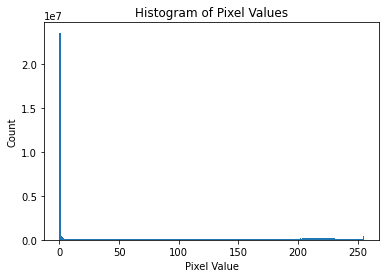

In [6]:
import matplotlib.pyplot as plt

# Flatten the train_images array to a 1D array
pixel_values = train_images.flatten()

# Plot the histogram of pixel values
plt.hist(pixel_values, bins=256, range=(0, 255))
plt.xlabel('Pixel Value')
plt.ylabel('Count')
plt.title('Histogram of Pixel Values')
plt.show()

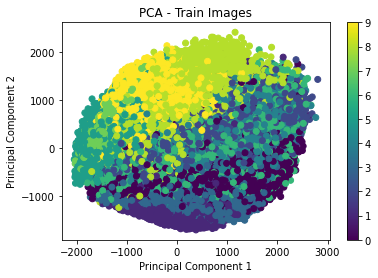

In [8]:
# Import the necessary libraries
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Flatten the train_images and test_images arrays to 1D arrays

train_images_flat = train_images.reshape(train_images.shape[0], -1)
test_images_flat = test_images.reshape(test_images.shape[0], -1)

# Create an instance of PCA with the desired number of components
pca = PCA(n_components=2)

# Fit the PCA model to the flattened train_images dataset
pca.fit(train_images_flat)

# Transform the train_images and test_images datasets using the fitted PCA model
train_images_pca = pca.transform(train_images_flat)
test_images_pca = pca.transform(test_images_flat)

# Plot the transformed train_images dataset

plt.scatter(train_images_pca[:, 0], train_images_pca[:, 1], c=train_labels, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA - Train Images')

plt.colorbar()
plt.show()
